In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from sklearn import preprocessing
from pycaret.classification import *

Big-5 personality prediction

In [2]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,34.137687,57.4320,89.603,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.000000,0.951057,0.151428,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2e8e67b776a24055b564,33.794544,57.6810,94.303,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,LOW,LOW,HIGH,HIGH,AVERAGE
2,621e2e8e67b776a24055b564,34.611011,57.4810,34.877,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,LOW,LOW,HIGH,HIGH,AVERAGE
3,621e2e8e67b776a24055b564,34.408304,57.4930,34.877,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967,LOW,LOW,HIGH,HIGH,AVERAGE
4,621e2e8e67b776a24055b564,34.178922,56.7500,103.034,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,62.41166,9557.9,74.401028,136.0,42.0,54.0,647.0,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,-0.433884,0.309017,-0.571268,0.5,-0.900969,0.951057,0.820763,LOW,LOW,HIGH,HIGH,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,33.816660,51.7600,47.281,11.6,79.0,0.700000,0.725,0.966667,-1.793898,1596.35,48.76235,5522.1,67.283493,122.0,4.0,32.0,800.0,56.371137,28920000.0,0.0,403.0,79.0,0.0,92.0,0.712644,1.067568,1.090196,0.684783,7231.0,41.0,1393.0,3.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866025,0.433884,0.587785,0.485302,0.5,-0.900969,0.809017,-0.874347,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3451,621e339967b776a240e502de,34.460723,51.3

predict extraversion

In [3]:
data = data.drop(columns=['ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

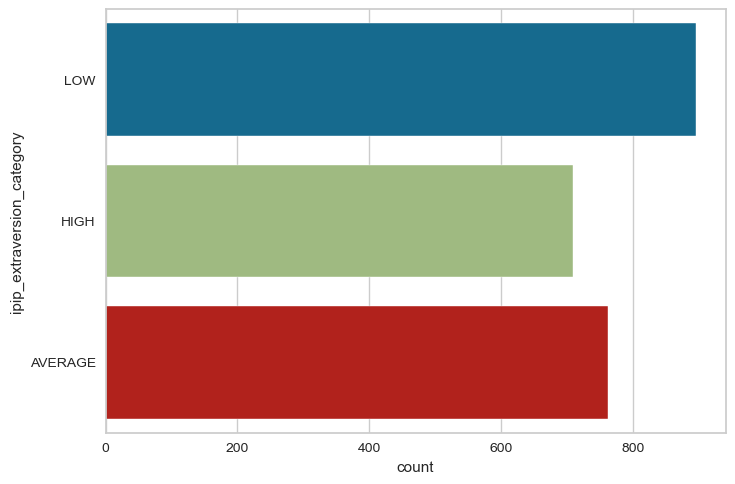

In [4]:
sns.countplot(y="ipip_extraversion_category", data=train_data)

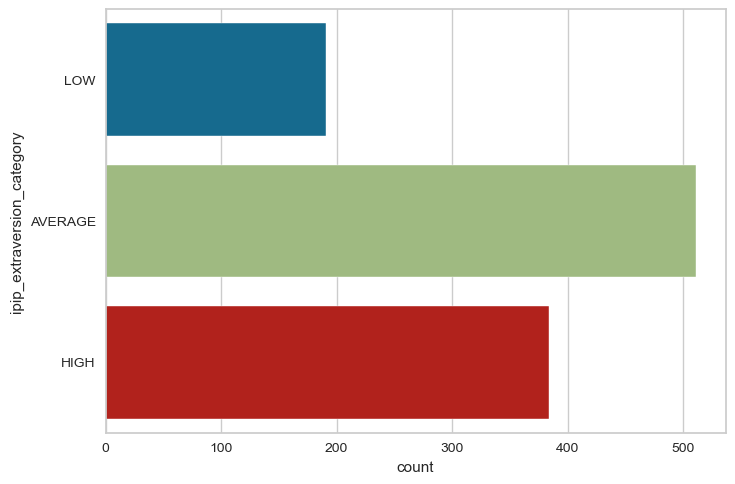

In [5]:
sns.countplot(y="ipip_extraversion_category", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='ipip_extraversion_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 64)"
5,Missing Values,False
6,Numeric Features,57
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3690,0.5316,0.3493,0.3881,0.3734,0.0400,0.0407,0.9333
lightgbm,Light Gradient Boosting Machine,0.3577,0.5454,0.3570,0.3753,0.3439,0.0379,0.0423,0.7600
gbc,Gradient Boosting Classifier,0.3461,0.5295,0.3674,0.3560,0.3260,0.0371,0.0387,1.7533
rf,Random Forest Classifier,0.3276,0.4640,0.3294,0.3472,0.3192,-0.0222,-0.0212,0.2200
dt,Decision Tree Classifier,0.3230,0.4857,0.3272,0.3492,0.3188,-0.0269,-0.0264,0.0567
dummy,Dummy Classifier,0.3206,0.5000,0.3333,0.1057,0.1582,0.0000,0.0000,0.0433
et,Extra Trees Classifier,0.3032,0.4128,0.3066,0.3376,0.3070,-0.0681,-0.0671,0.1733
qda,Quadratic Discriminant Analysis,0.2720,0.4281,0.2480,0.3643,0.2406,-0.1653,-0.2182,0.0700
ada,Ada Boost Classifier,0.2655,0.4553,0.3077,0.3173,0.2487,-0.0479,-0.0590,0.2133
nb,Naive Bayes,0.2520,0.3689,0.2738,0.2072,0.2138,-0.1164,-0.1348,0.7800


In [9]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
plot_model(best, plot='feature')

predict agreeableness

In [11]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [12]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

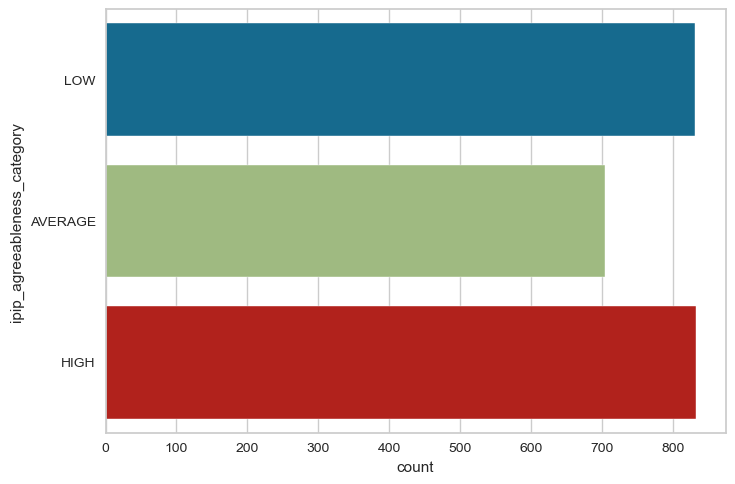

In [13]:
sns.countplot(y="ipip_agreeableness_category", data=train_data)

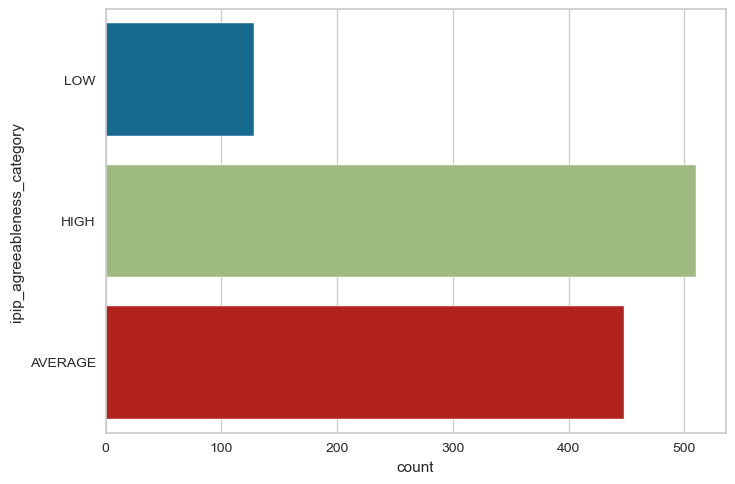

In [14]:
sns.countplot(y="ipip_agreeableness_category", data=test_data)

In [15]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [16]:
s = setup(data=train_data, target='ipip_agreeableness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 64)"
5,Missing Values,False
6,Numeric Features,57
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3447,0.4992,0.3296,0.3654,0.3497,0.0057,0.0053,0.3133
dummy,Dummy Classifier,0.3007,0.5000,0.3333,0.1022,0.1502,0.0000,0.0000,0.0433
nb,Naive Bayes,0.2621,0.3579,0.2316,0.2510,0.2079,-0.1759,-0.1755,0.0567
ada,Ada Boost Classifier,0.2474,0.3883,0.2283,0.2465,0.2445,-0.1649,-0.1677,0.1567
qda,Quadratic Discriminant Analysis,0.2199,0.4016,0.2276,0.2234,0.1940,-0.1291,-0.1550,0.0567
ridge,Ridge Classifier,0.1999,0.0000,0.1913,0.2182,0.1992,-0.2100,-0.2193,0.0433
dt,Decision Tree Classifier,0.1994,0.4073,0.1949,0.2408,0.2096,-0.1747,-0.1896,0.0500
lda,Linear Discriminant Analysis,0.1961,0.3241,0.1875,0.2112,0.1949,-0.2204,-0.2287,0.0600
lightgbm,Light Gradient Boosting Machine,0.1925,0.3704,0.1856,0.2292,0.1959,-0.2038,-0.2126,0.6900
et,Extra Trees Classifier,0.1881,0.3240,0.1820,0.2512,0.1989,-0.2044,-0.2152,0.1800


In [18]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
plot_model(best, plot='feature')

predict conscientiousness

In [20]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [21]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

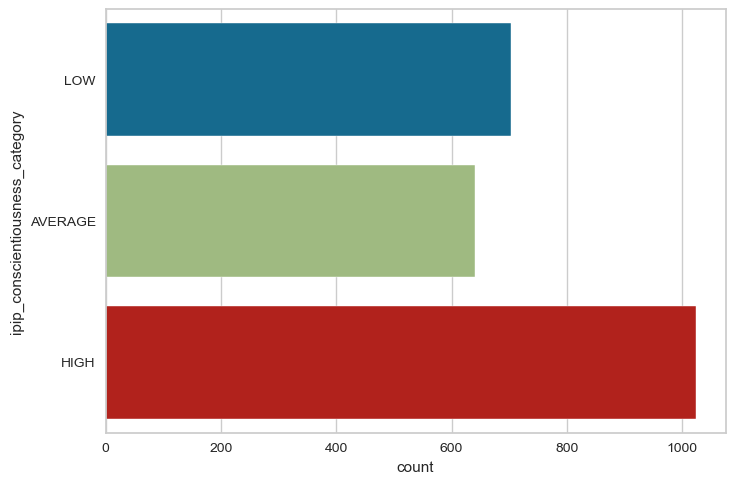

In [22]:
sns.countplot(y="ipip_conscientiousness_category", data=train_data)

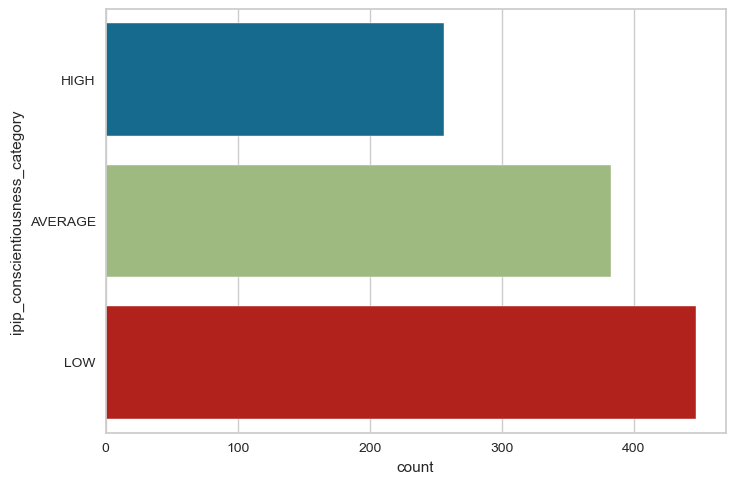

In [23]:
sns.countplot(y="ipip_conscientiousness_category", data=test_data)

In [24]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [25]:
s = setup(data=train_data, target='ipip_conscientiousness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_conscientiousness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 64)"
5,Missing Values,False
6,Numeric Features,57
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.3571,0.4843,0.3292,0.3130,0.3232,0.0220,0.0242,0.1833
knn,K Neighbors Classifier,0.3471,0.5336,0.3552,0.4139,0.3629,0.0448,0.0471,0.3633
rf,Random Forest Classifier,0.3436,0.5207,0.3178,0.3086,0.3116,0.0039,0.0066,0.2200
lightgbm,Light Gradient Boosting Machine,0.3400,0.4890,0.3193,0.2989,0.3086,-0.0129,-0.0045,0.6400
gbc,Gradient Boosting Classifier,0.3311,0.5240,0.3096,0.3083,0.3081,-0.0096,-0.0033,1.8167
svm,SVM - Linear Kernel,0.3288,0.0000,0.2971,0.2999,0.3025,-0.0238,-0.0235,0.0500
lda,Linear Discriminant Analysis,0.3270,0.5042,0.2994,0.3191,0.3054,-0.0017,-0.0031,0.0433
ridge,Ridge Classifier,0.3258,0.0000,0.2972,0.3217,0.3058,-0.0045,-0.0064,0.0400
ada,Ada Boost Classifier,0.3224,0.3817,0.3268,0.3304,0.2987,0.0094,0.0174,0.1800
lr,Logistic Regression,0.3161,0.5179,0.2905,0.2990,0.2903,-0.0244,-0.0256,0.2333


In [27]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

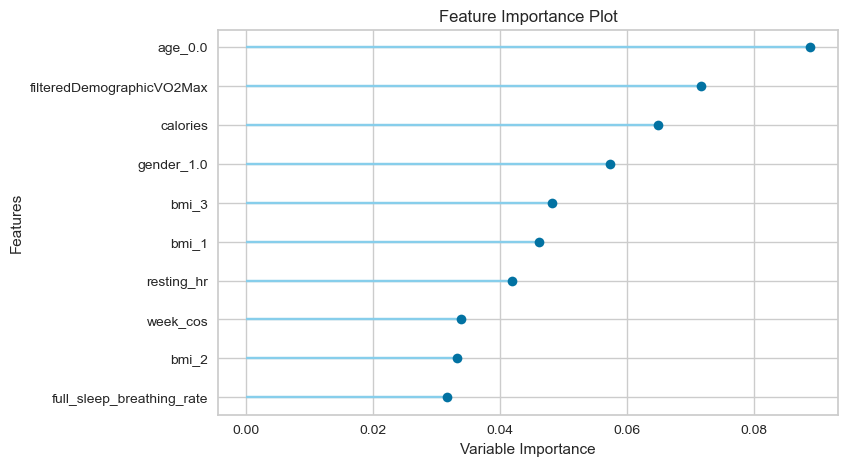

In [28]:
plot_model(best, plot='feature')

predict stability

In [29]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [30]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

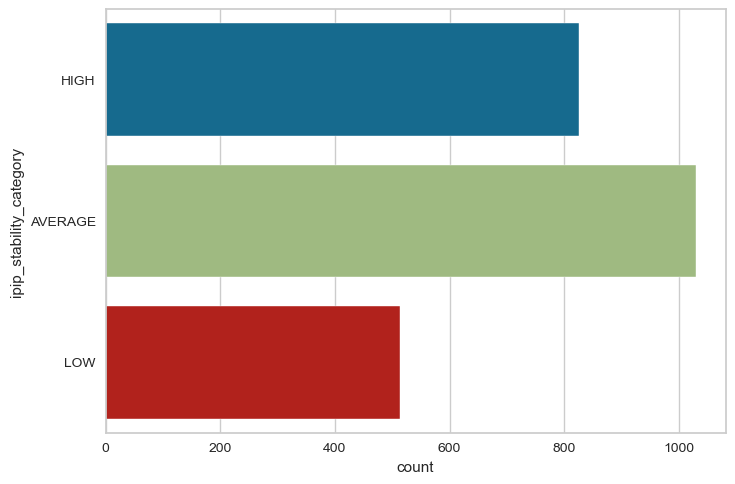

In [31]:
sns.countplot(y="ipip_stability_category", data=train_data)

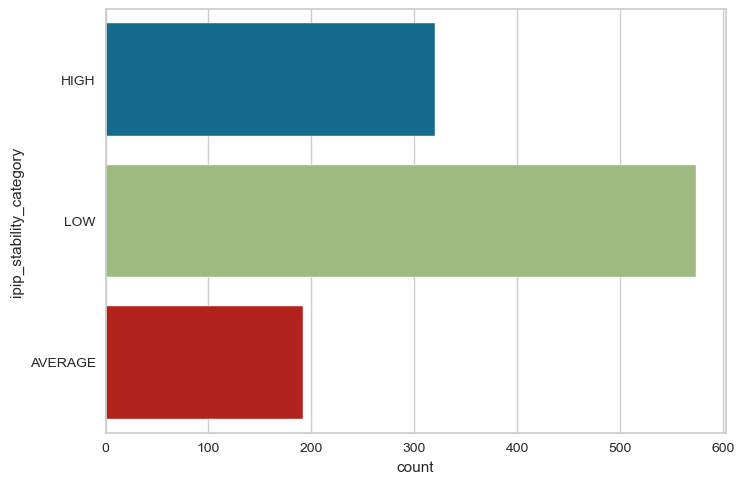

In [32]:
sns.countplot(y="ipip_stability_category", data=test_data)

In [33]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [34]:
s = setup(data=train_data, target='ipip_stability_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 64)"
5,Missing Values,False
6,Numeric Features,57
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4338,0.5000,0.3333,0.1935,0.2662,0.0000,0.0000,0.0400
qda,Quadratic Discriminant Analysis,0.3414,0.5003,0.3373,0.4663,0.2595,0.0003,0.0181,0.0600
nb,Naive Bayes,0.2913,0.3383,0.2666,0.3113,0.2427,-0.0938,-0.0903,0.0733
knn,K Neighbors Classifier,0.2488,0.3820,0.2419,0.2662,0.2488,-0.1516,-0.1559,0.2967
lda,Linear Discriminant Analysis,0.2061,0.3287,0.2104,0.2372,0.2079,-0.1753,-0.1859,0.0467
ada,Ada Boost Classifier,0.2049,0.3796,0.2185,0.2480,0.1997,-0.1400,-0.1594,0.1767
ridge,Ridge Classifier,0.2021,0.0000,0.2055,0.2338,0.2048,-0.1818,-0.1929,0.0400
dt,Decision Tree Classifier,0.1969,0.4054,0.2248,0.1998,0.1782,-0.1653,-0.1947,0.0767
svm,SVM - Linear Kernel,0.1874,0.0000,0.1799,0.2293,0.1891,-0.2023,-0.2205,0.0600
lr,Logistic Regression,0.1659,0.3180,0.1508,0.2141,0.1732,-0.2402,-0.2595,0.3300


In [36]:
best

DummyClassifier(constant=None, random_state=123, strategy='prior')

In [ ]:
plot_model(best, plot='feature')

predict intellect

In [38]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [39]:
data = data.drop(columns=['ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

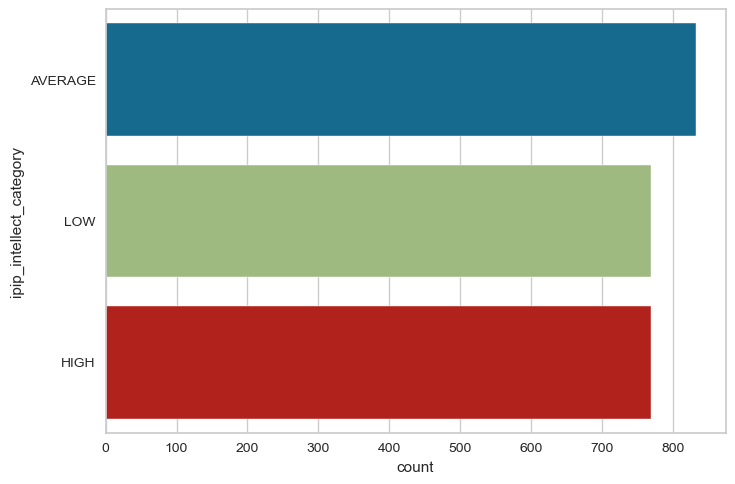

In [40]:
sns.countplot(y="ipip_intellect_category", data=train_data)

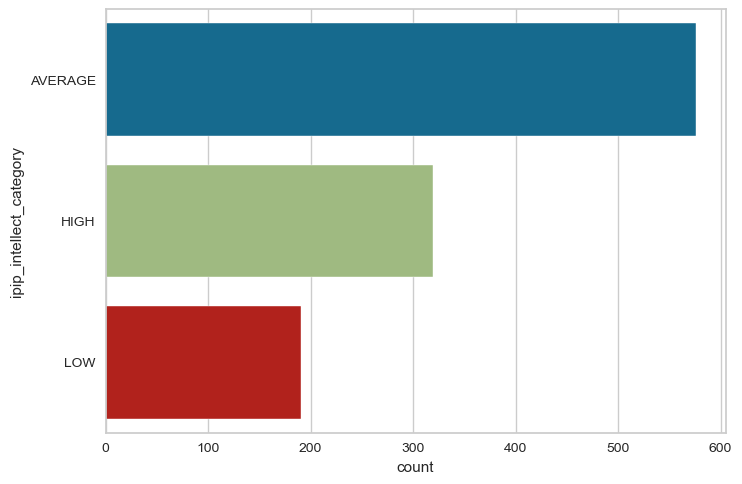

In [41]:
sns.countplot(y="ipip_intellect_category", data=test_data)

In [42]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [43]:
s = setup(data=train_data, target='ipip_intellect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 64)"
5,Missing Values,False
6,Numeric Features,57
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [44]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.4110,0.5597,0.3720,0.3366,0.3561,0.0745,0.0829,0.0533
gbc,Gradient Boosting Classifier,0.3605,0.5188,0.3515,0.3817,0.3578,0.0437,0.0441,1.4033
knn,K Neighbors Classifier,0.3547,0.5125,0.3377,0.3692,0.3496,0.0155,0.0171,0.2667
dummy,Dummy Classifier,0.3522,0.5000,0.3333,0.1266,0.1855,0.0000,0.0000,0.0400
ada,Ada Boost Classifier,0.3438,0.5732,0.3505,0.3643,0.3392,0.0255,0.0217,0.2033
lightgbm,Light Gradient Boosting Machine,0.3387,0.4977,0.3390,0.3973,0.3445,0.0274,0.0289,0.4133
rf,Random Forest Classifier,0.3343,0.4896,0.3330,0.3952,0.3466,0.0184,0.0209,0.2000
lda,Linear Discriminant Analysis,0.3298,0.5079,0.3055,0.3687,0.3436,-0.0096,-0.0101,0.0467
ridge,Ridge Classifier,0.3238,0.0000,0.3020,0.3650,0.3382,-0.0159,-0.0164,0.0500
lr,Logistic Regression,0.3147,0.4879,0.3026,0.3669,0.3307,-0.0208,-0.0213,0.2633


In [45]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
plot_model(best, plot='feature')

Stai stress category prediction

In [47]:
data = pd.read_pickle('data/fitbit_stai_processed.pkl')
data

,id,stai_stress,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,stai_stress_category
0,621e2e8e67b776a24055b564,45.0,34.408304,57.481,94.303,14.8,81.0,0.866667,0.725,0.866667,...,0.0,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148,Below average
1,621e2e8e67b776a24055b564,46.0,34.476865,56.570,109.509,14.4,83.0,0.833333,0.775,0.800000,...,0.0,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528,Average
2,621e2e8e67b776a24055b564,46.0,34.254286,57.330,100.374,15.0,75.0,0.833333,0.700,0.766667,...,0.0,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131,Average
3,621e2e8e67b776a24055b564,46.0,34.515655,59.798,98.515,15.4,74.0,0.766667,0.725,0.700000,...,0.0,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131,Average
4,621e2e8e67b776a24055b564,54.0,34.418045,53.006,107.388,15.6,76.0,0.766667,0.700,0.766667,...,0.0,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,621e339967b776a240e502de,49.0,34.050838,61.043,34.792,14.4,77.0,0.766667,0.750,0.766667,...,0.0,7.071068e-01,0.000000,7.557496e-01,-0.994522,-7.071068e-01,1.000000,0.654861,-0.104528,Average
275,621e339967b776a240e502de,51.0,34.674633,51.192,49.232,12.2,83.0,0.733333,0.925,0.800000,...,0.0,3.673940e-16,0.000000,9.898214e-01,0.951057,-1.000000e+00,1.000000,0.142315,0.309017,Above average
276,621e339967b776a240e502de,45.0,34.303759,46.311,56.468,11.0,87.0,0.833333,0.900,0.900000,...,0.0,3.673940e-16,0.781831,9.898214e-01,0.207912,-1.000000e+00,0.623490,-0.142315,-0.978148,Below average
277,621e339967b776a240e502de,48.0,34.876472,50.683,47.293,11.6,82.0,0.766667,0.875,0.866667,...,0.0,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000,Average


In [48]:
data = data.drop(columns=['stai_stress'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

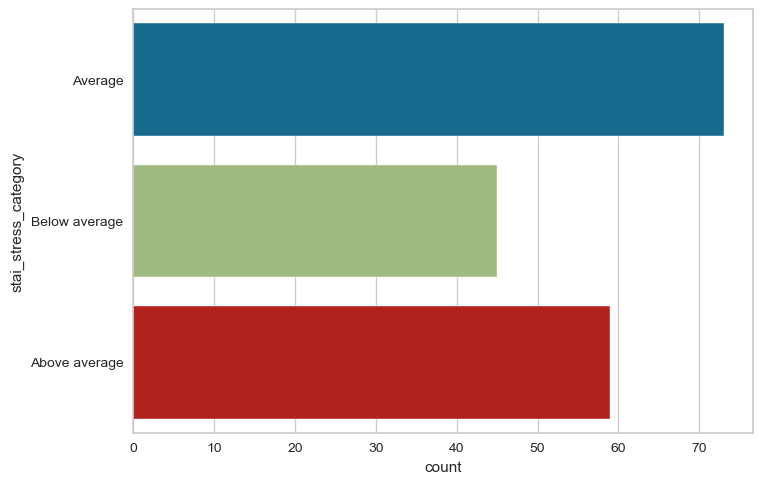

In [49]:
sns.countplot(y="stai_stress_category", data=train_data)

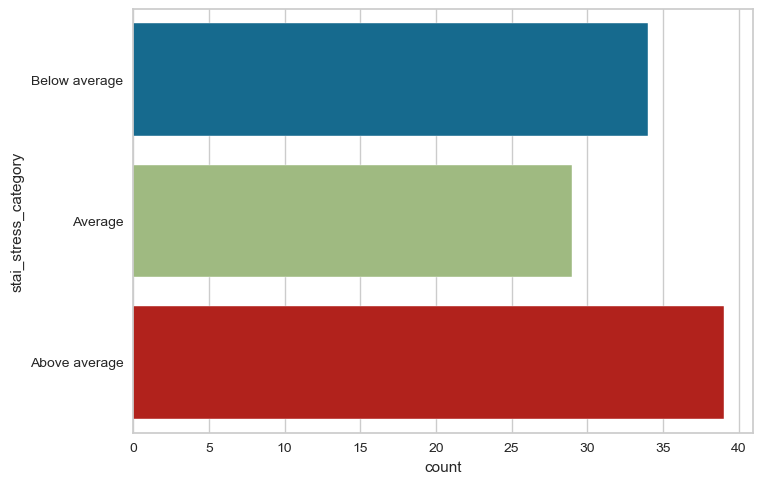

In [50]:
sns.countplot(y="stai_stress_category", data=test_data)

In [51]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [52]:
s = setup(data=train_data, target='stai_stress_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,stai_stress_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(177, 64)"
5,Missing Values,False
6,Numeric Features,49
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [53]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3955,0.4734,0.3443,0.3552,0.3671,0.0231,0.0227,0.0533
rf,Random Forest Classifier,0.3842,0.4975,0.3388,0.4102,0.3853,0.0423,0.0439,0.1100
dt,Decision Tree Classifier,0.3729,0.5405,0.3645,0.4358,0.3860,0.0678,0.0685,0.0367
qda,Quadratic Discriminant Analysis,0.3672,0.5130,0.3560,0.2042,0.2307,0.0258,0.0369,0.0167
lightgbm,Light Gradient Boosting Machine,0.3559,0.4860,0.3325,0.3899,0.3478,0.0142,0.0170,0.0367
lda,Linear Discriminant Analysis,0.3446,0.4904,0.3315,0.3659,0.3432,0.0114,0.0128,0.0133
lr,Logistic Regression,0.3390,0.4922,0.3138,0.3415,0.3316,-0.0178,-0.0179,0.0333
ridge,Ridge Classifier,0.3390,0.0000,0.3222,0.3613,0.3331,-0.0031,-0.0033,0.0167
dummy,Dummy Classifier,0.3333,0.5000,0.3333,0.1162,0.1710,0.0000,0.0000,0.0167
svm,SVM - Linear Kernel,0.3164,0.0000,0.2969,0.3255,0.3004,-0.0367,-0.0376,0.0233


In [54]:
best

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

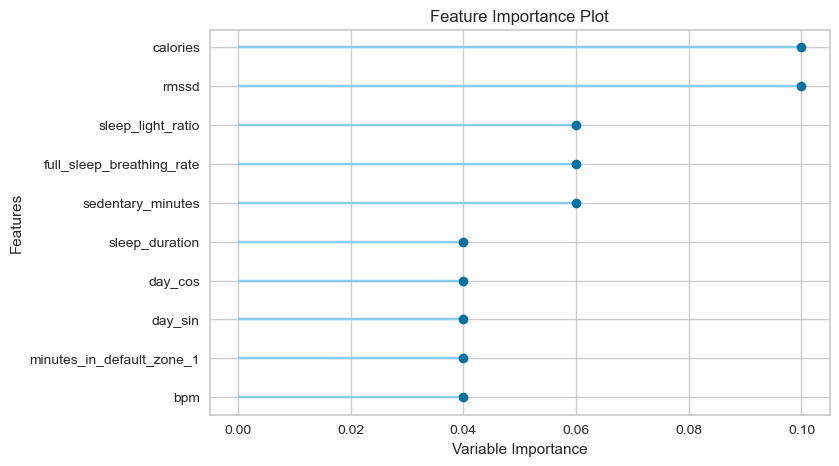

In [55]:
plot_model(best, plot='feature')

Panas negative affect category prediction

In [56]:
data = pd.read_pickle('data/fitbit_panas_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,negative_affect_category
0,621e2e8e67b776a24055b564,34.515655,59.798,98.515,15.4,74.0,0.766667,0.725,0.700000,-1.972848,...,0.0,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131,Below average
1,621e2e8e67b776a24055b564,34.408304,57.481,94.303,14.8,81.0,0.866667,0.725,0.866667,-2.385801,...,0.0,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148,Below average
2,621e2e8e67b776a24055b564,34.476865,56.570,109.509,14.4,83.0,0.833333,0.775,0.800000,-1.912061,...,0.0,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528,Below average
3,621e2e8e67b776a24055b564,34.418045,53.006,107.388,15.6,76.0,0.766667,0.700,0.766667,-2.170245,...,0.0,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545,Below average
4,621e2e8e67b776a24055b564,34.254286,57.330,100.374,15.0,75.0,0.833333,0.700,0.766667,-2.154991,...,0.0,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131,Below average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,34.876472,50.683,47.293,11.6,82.0,0.766667,0.875,0.866667,-1.986618,...,0.0,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000,Below average
264,621e339967b776a240e502de,35.107574,54.325,47.929,12.2,87.0,0.866667,0.950,0.766667,-1.998401,...,0.0,3.673940e-16,0.000000,7.557496e-01,-0.587785,-1.000000e+00,1.000000,-0.654861,0.809017,Below average
265,621e339967b776a240e502de,34.957428,52.810,47.801,12.4,81.0,0.700000,0.900,0.866667,-2.028679,...,0.0,7.071068e-01,0.000000,2.817326e-01,0.587785,7.071068e-01,1.000000,0.959493,0.809017,Below average
266,621e339967b776a240e502de,34.073346,51.364,51.324,12.2,84.0,0.833333,0.875,0.866667,-2.023243,...,0.0,7.071068e-01,0.974928,5.406408e-01,0.587785,7.071068e-01,-0.222521,0.841254,-0.809017,Below average


In [57]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [58]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [59]:
s = setup(data=train_data, target='negative_affect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True, normalize_method='minmax', transformation=True)

,Description,Value
0,session_id,123
1,Target,negative_affect_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(166, 64)"
5,Missing Values,False
6,Numeric Features,49
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [60]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3371,0.5049,0.3510,0.3288,0.3008,0.0196,0.0186,0.0300
dt,Decision Tree Classifier,0.3252,0.4971,0.3447,0.3758,0.3290,0.0001,0.0015,0.0400
dummy,Dummy Classifier,0.3192,0.5000,0.3333,0.1056,0.1578,0.0000,0.0000,0.0133
qda,Quadratic Discriminant Analysis,0.2955,0.5000,0.3333,0.0928,0.1396,0.0000,0.0000,0.0100
lda,Linear Discriminant Analysis,0.2950,0.4595,0.3247,0.2956,0.2725,-0.0221,-0.0240,0.0100
ridge,Ridge Classifier,0.2768,0.0000,0.3069,0.2756,0.2513,-0.0463,-0.0502,0.0433
et,Extra Trees Classifier,0.2709,0.4237,0.2930,0.2765,0.2518,-0.0747,-0.0759,0.0933
lightgbm,Light Gradient Boosting Machine,0.2708,0.4347,0.2884,0.3449,0.2627,-0.0618,-0.0644,0.0367
svm,SVM - Linear Kernel,0.2648,0.0000,0.2907,0.2863,0.2454,-0.0675,-0.0743,0.0600
knn,K Neighbors Classifier,0.2591,0.4262,0.2645,0.2495,0.2419,-0.1082,-0.1147,0.0233


In [61]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
plot_model(best, plot='feature')